# **Plant Images Import and Pre-Cleaning**

Date: 26/09/2022

Contact: potchara.wongyai@gmail.com

Program: Data Science BootCamp

Institution: BrainStation, Toronto, Ontario

**<u>Overview</u>**

In this notebook, plant seedling images stored in the local directory are read-in, pre-cleaned, and converted to a numpy array **''X''**. The label of the images are assigned based on the folder names the images are located in. The labels are then assigned to a numpy array **''y''**. Both variables are exported to `.npy` files. 

The pre-cleaning process includes:
- adding black background to maintain the aspect ratio of 1
- resizing images to 224 x 224
- changing images datatype to 'uint8'

**<u>OUTPUT</u>** 
- 'X-Plant-224.npy': pre-clean images stored as a numpy array
- 'y-Plant-224.npy': labels stored as a numpy array

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns

In [2]:
# function to add black background
def add_background(image):
    H = image.shape[0]    # image height
    W = image.shape[1]    # image width

    if H > W: # add black background when H > W 
        black = np.zeros([H, H]) # black image shape H x H
        gap = int((H - W)/2) # gap size
        new_image = np.dstack([black,black,black]).astype('uint8') # black image in RGB
        new_image [:, gap:(gap+W), :] = image # combine image with black background
    
    elif W > H: # add black background when W > H 
        black = np.zeros([W, W])  # black image shape W x W
        gap = int((W - H)/2) # gap size
        new_image = np.dstack([black,black,black]).astype('uint8') # black image in RGB
        new_image [gap:(gap+H), :, :] = image # combine image with black background
    else:
        new_image = image # no change if aspect ratio = 1
        
    return new_image # return new image

In [3]:
# Read-in images
# example from https://www.youtube.com/watch?v=j-3vuBynnOE

# define working directory - where train folder is located
working_dir = "C:/Users/potch/Desktop/Project/1-Brain Station/Capstone/plant-seedlings-classification/train"

# name of folders in "train"
classification = ["Black-grass",
                  "Charlock", 
                  "Cleavers",
                  "Common Chickweed",
                  "Common wheat",
                  "Fat Hen",
                  "Loose Silky-bent",
                  "Maize",
                  "Scentless Mayweed",
                  "Shepherds Purse",
                  "Small-flowered Cranesbill",
                  "Sugar beet"]

size = 224 # image size
X=[] # empty list
y=[] # empty list
AR_limit = 0.02 #percent aspect ratio
size_limit = 100 # pixels
j=0 # track image number
issue1=0 # track issue 1
issue2=0  # track issue 2

for i in classification:
    path = os.path.join(working_dir, i) # path
    for file_name in os.listdir(path):
        
        image = cv2.imread(os.path.join(path, file_name)) # read image from path (as BGR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert BGR to RGB
        
        aspect_ratio = round(image.shape[1]/image.shape[0],3) # image aspect ratio
        if (aspect_ratio < 1-AR_limit) | (aspect_ratio > 1+AR_limit): # check whether image exceeds aspect ratio limit
            print(f'{i}  image: {file_name}   aspect ratio: {aspect_ratio}   img: {j}')
            issue1+=1
            image = add_background(image) # add black background

        j+=1
            
        image = cv2.resize(image, (size,size)) # resize 
        X.append(image) # append image
        y.append(i) # append label 

# some code examples from https://www.youtube.com/watch?v=j-3vuBynnOE

X = np.array(X) # convert to numpy array
y = np.array(y) # convert to numpy array

Black-grass  image: 0bb75ded8.png   aspect ratio: 1.03   img: 10
Black-grass  image: 1a125880e.png   aspect ratio: 1.134   img: 28
Black-grass  image: 5e4d1ee0d.png   aspect ratio: 1.332   img: 98
Black-grass  image: 77629b9e3.png   aspect ratio: 0.957   img: 119
Black-grass  image: 8029e3396.png   aspect ratio: 1.293   img: 126
Black-grass  image: a8ab1ff26.png   aspect ratio: 1.111   img: 167
Black-grass  image: ae8f69724.png   aspect ratio: 1.111   img: 178
Black-grass  image: c0cbaa32c.png   aspect ratio: 1.054   img: 197
Loose Silky-bent  image: 02b15993e.png   aspect ratio: 0.953   img: 2254
Loose Silky-bent  image: 0cf9eb4ab.png   aspect ratio: 0.943   img: 2275
Loose Silky-bent  image: 1266e39c7.png   aspect ratio: 1.034   img: 2285
Loose Silky-bent  image: 180a7bc07.png   aspect ratio: 0.943   img: 2301
Loose Silky-bent  image: 1fcfb8677.png   aspect ratio: 1.093   img: 2317
Loose Silky-bent  image: 39e081b5f.png   aspect ratio: 1.065   img: 2373
Loose Silky-bent  image: 3d9f8

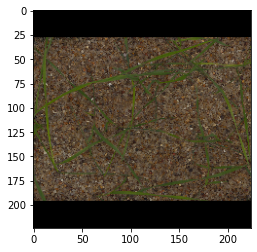

In [4]:
# example image
plt.imshow(X[98])

In [5]:
# export variables
np.save('X-Plant-224.npy', X)
np.save('y-Plant-224.npy', y)